# Sydney Toll Road exploration
Exploring the use of all the toll roads in Sydney, Australia.
Check out TransportVis.ipynb for more of an introduction.

In [1]:
#Import the python packages needed
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
#Load in allllll the data
t1=time.time()
all_files = glob.glob("data/*.csv")
li = []
for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, index_col=None, header=0,parse_dates=[['Date', 'IntervalStart']])
    li.append(df)
    
df = pd.concat(li, axis=0, ignore_index=True)

#Slightly faster way to load data, and far more elegent, but does not show progress...
#df = pd.concat(map(lambda file: pd.read_csv(file, index_col=None, header=0,parse_dates=[['Date', 'IntervalStart']]), all_files))

t2=time.time()
print("Time to Load:", t2-t1)

data/CCT_trips_2008-11.csv
data/CCT_trips_2008-12.csv
data/CCT_trips_2009-01.csv
data/CCT_trips_2009-02.csv
data/CCT_trips_2009-03.csv
data/CCT_trips_2009-04.csv
data/CCT_trips_2009-05.csv
data/CCT_trips_2009-06.csv
data/CCT_trips_2009-07.csv
data/CCT_trips_2009-08.csv
data/CCT_trips_2009-09.csv
data/CCT_trips_2009-10.csv
data/CCT_trips_2009-11.csv
data/CCT_trips_2009-12.csv
data/CCT_trips_2010-01.csv
data/CCT_trips_2010-02.csv
data/CCT_trips_2010-03.csv
data/CCT_trips_2010-04.csv
data/CCT_trips_2010-05.csv
data/CCT_trips_2010-06.csv
data/CCT_trips_2010-07.csv
data/CCT_trips_2010-08.csv
data/CCT_trips_2010-09.csv
data/CCT_trips_2010-10.csv
data/CCT_trips_2010-11.csv
data/CCT_trips_2010-12.csv
data/CCT_trips_2011-01.csv
data/CCT_trips_2011-02.csv
data/CCT_trips_2011-03.csv
data/CCT_trips_2011-04.csv
data/CCT_trips_2011-05.csv
data/CCT_trips_2011-06.csv
data/CCT_trips_2011-07.csv
data/CCT_trips_2011-08.csv
data/CCT_trips_2011-09.csv
data/CCT_trips_2011-10.csv
data/CCT_trips_2011-11.csv
d

data/LCT_trips_2014-03.csv
data/LCT_trips_2014-04.csv
data/LCT_trips_2014-05.csv
data/LCT_trips_2014-06.csv
data/LCT_trips_2014-07.csv
data/LCT_trips_2014-08.csv
data/LCT_trips_2014-09.csv
data/LCT_trips_2014-10.csv
data/LCT_trips_2014-11.csv
data/LCT_trips_2014-12.csv
data/LCT_trips_2015-01.csv
data/LCT_trips_2015-02.csv
data/LCT_trips_2015-03.csv
data/LCT_trips_2015-04.csv
data/LCT_trips_2015-05.csv
data/LCT_trips_2015-06.csv
data/LCT_trips_2015-07.csv
data/LCT_trips_2015-08.csv
data/LCT_trips_2015-09.csv
data/LCT_trips_2015-10.csv
data/LCT_trips_2015-11.csv
data/LCT_trips_2015-12.csv
data/LCT_trips_2016-01.csv
data/LCT_trips_2016-02.csv
data/LCT_trips_2016-03.csv
data/LCT_trips_2016-04.csv
data/LCT_trips_2016-05.csv
data/LCT_trips_2016-06.csv
data/LCT_trips_2016-07.csv
data/LCT_trips_2016-08.csv
data/LCT_trips_2016-09.csv
data/LCT_trips_2016-10.csv
data/LCT_trips_2016-11.csv
data/LCT_trips_2016-12.csv
data/LCT_trips_2017-01.csv
data/LCT_trips_2017-02.csv
data/LCT_trips_2017-03.csv
d

data/M7_passages_2015-12.csv
data/M7_passages_2016-01.csv
data/M7_passages_2016-02.csv
data/M7_passages_2016-03.csv
data/M7_passages_2016-04.csv
data/M7_passages_2016-05.csv
data/M7_passages_2016-06.csv
data/M7_passages_2016-07.csv
data/M7_passages_2016-08.csv
data/M7_passages_2016-09.csv
data/M7_passages_2016-10.csv
data/M7_passages_2016-11.csv
data/M7_passages_2016-12.csv
data/M7_passages_2017-01.csv
data/M7_passages_2017-02.csv
data/M7_passages_2017-03.csv
data/M7_passages_2017-04.csv
data/M7_passages_2017-05.csv
data/M7_passages_2017-06.csv
data/M7_passages_2017-07.csv
data/M7_passages_2017-08.csv
data/M7_passages_2017-09.csv
data/M7_passages_2017-10.csv
data/M7_passages_2017-11.csv
data/M7_passages_2017-12.csv
data/M7_passages_2018-01.csv
data/M7_passages_2018-02.csv
data/M7_passages_2018-03.csv
data/M7_passages_2018-04.csv
data/M7_passages_2018-05.csv
data/M7_passages_2018-06.csv
data/M7_passages_2018-07.csv
data/M7_passages_2018-08.csv
data/M7_passages_2018-09.csv
data/M7_passag

Let's look at the some of the data ,just to get a feel of it. 

What are we working with?

Is it a timeseries? Spatial? XYZ? Labels? Classes? Bit of everything? 

In [3]:
df.head()

,Date_IntervalStart,AssetID,FinancialQtrID,IntervalEnd,Version,VehicleClass,TollPointID,GantryDirection,GantryLocation,GantryGPSLatitude,GantryGPSLongitude,GantryType,TotalVolume
0,2008-11-26,CCT,200902,00:14,1,Car,East,E,Mainline Eastbound,-33.8,151.2,Mainline Gantry,26
1,2008-11-26,CCT,200902,00:14,1,Truck,East,E,Mainline Eastbound,-33.8,151.2,Mainline Gantry,0
2,2008-11-26,CCT,200902,00:14,1,Car,SJY,N,Sir John Young,-33.8,151.2,Ramp Gantry,8
3,2008-11-26,CCT,200902,00:14,1,Truck,SJY,N,Sir John Young,-33.8,151.2,Ramp Gantry,0
4,2008-11-26,CCT,200902,00:14,1,Car,West,W,Mainline Westbound,-33.8,151.2,Mainline Gantry,16


In [4]:
df.describe()

,FinancialQtrID,Version,GantryGPSLatitude,GantryGPSLongitude,TotalVolume
count,4.177137e+07,4.177137e+07,4.177137e+07,4.177137e+07,4.177137e+07
mean,2.014960e+05,1.122623e+00,-3.381127e+01,1.509369e+02,5.939552e+01
std,3.301788e+02,3.963629e-01,1.671663e-01,7.038277e-01,1.542445e+02
min,2.009010e+05,1.000000e+00,-3.394317e+01,0.000000e+00,0.000000e+00
25%,2.012030e+05,1.000000e+00,-3.384499e+01,1.508522e+02,4.000000e+00
50%,2.015030e+05,1.000000e+00,-3.380192e+01,1.508578e+02,1.500000e+01
75%,2.018020e+05,1.000000e+00,-3.376190e+01,1.510000e+02,4.900000e+01
max,2.020020e+05,3.000000e+00,0.000000e+00,1.512184e+02,1.109400e+04


In [5]:
"Yikes! That is {:,} total trips on sydney Toll roads (not including M5) since 2009".format(df["TotalVolume"].sum())

'Yikes! That is 2,481,032,272 total trips on sydney Toll roads (not including M5) since 2009'

In [6]:
"Let's plot all the {:,} rows of data. Quite a few different ways to plot this....".format(df.shape[0])

"Let's plot all the 41,771,369 rows of data. Quite a few different ways to plot this...."

/home/nbutter/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


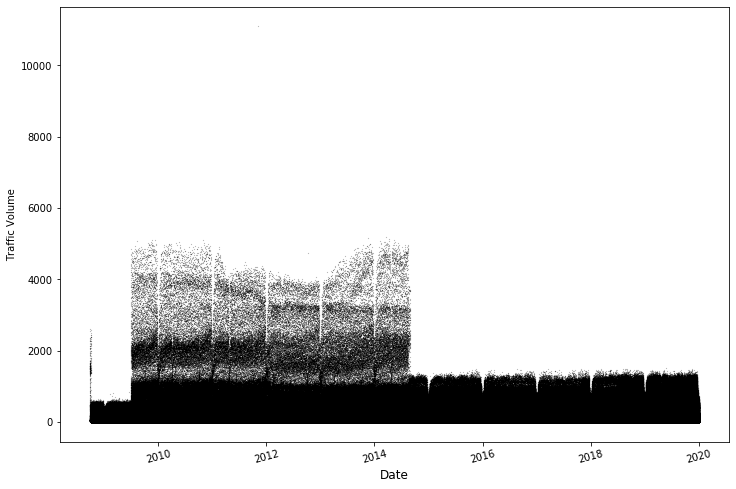

In [7]:
#Start with a simple time vs volume plot. 
#This will give us a general overview for when are the busy times. 
#But a lot of details are overprinted and lost in the scope of the data
plt.figure(figsize=(12,8)) 
plt.plot(df["Date_IntervalStart"],df["TotalVolume"].values,
         color='black', marker='.',markersize=0.2,linewidth=0.0)

plt.xlabel('Date',fontsize=12)
plt.ylabel('Traffic Volume')
plt.xticks(rotation=15)

plt.show()

There are some NaNs in the data, so let's just ditch them.

In [8]:
print("Dataframe shape with nans: ",df.shape)
df=df.dropna()
print("Dataframe shape dropped nans: ",df.shape)

Dataframe shape with nans:  (41771369, 13)
Dataframe shape dropped nans:  (41679831, 13)


There are also some weird point locations that are apparently at lat/lon 0,0. I don't believe it, so ditch them too. These are probably captured by the nan-removal in the previous step but will keep here for fun.

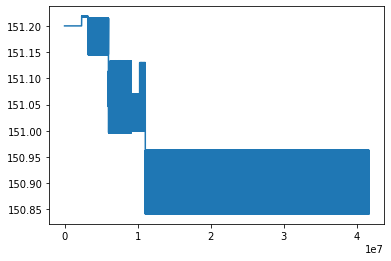

Dataframe shape:  (41679831, 13)


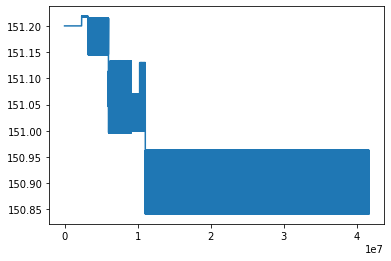

In [9]:
#Check the lat/lon on a plot
plt.plot(df["GantryGPSLongitude"].values)
plt.show()

df=df[df.GantryGPSLongitude != 0]
print("Dataframe shape: ",df.shape)

plt.plot(df["GantryGPSLongitude"].values)
plt.show()

What is a useful way to represent the data?

We have a bunch of toll points. We have a time series representing how busy each point is? 
All time is probably not a great way to look at it, so let's plot it just for one year at a time.

In [10]:
dfsort = df.sort_index()

In [11]:
#Pull out a single year
dfshort=dfsort[(dfsort.Date_IntervalStart>'2019-01-01 00:00:00') & (dfsort.Date_IntervalStart<'2020-01-01 00:00:00')]

In [12]:
#Get a list of the Toll point names
gantryUnique=dfshort["GantryLocation"].unique()

#Now find the total volume of cars passing through each toll point
gantSums=np.zeros([len(gantryUnique),3])
for i,gant in enumerate(gantryUnique):
    print(i,gant)
    gantSum=dfshort[dfshort["GantryLocation"]==gant].TotalVolume.sum()
    gidx=dfshort[dfshort.GantryLocation==gant].first_valid_index()
    idxLat=dfshort.loc[gidx].GantryGPSLatitude
    idxLon=dfshort.loc[gidx].GantryGPSLongitude
    gantSums[i,0]=idxLat
    gantSums[i,1]=idxLon
    gantSums[i,2]=gantSum

print(gantSums)
print(np.sum(gantSums[:,2]))

0 Mainline Eastbound
1 Sir John Young
2 Mainline Westbound
3 Woolloomooloo Toll Plaza North-bound
4 William Street North-bound exit ramp
5 Military Road North-bound entry ramp
6 Military Road South-bound exit ramp
7 Lane Cove Tunnel East-bound
8 Lane Cove Tunnel West-bound
9 North Ryde main carriageway East-bound
10 North Ryde main carriageway West-bound
11 Pennant Hills Rd East-bound exit ramp
12 Pennant Hills Rd West-bound entry ramp
13 Christie Road East-bound entry ramp
14 Herring Road West-bound exit ramp
15 Windsor Rd east-bound exit ramp
16 Windsor Rd West-bound entry ramp
17 Lane Cove Road ramp Eastbound
18 Church St Exit
19 Church St Entry
20 James Ruse Dr Entry
21 James Ruse Dr Exit
22 Silverwater Rd Exit
23 Silverwater Rd Entry
24 Hill Rd Exit
25 Hill Rd Entry
26 Homebush Bay Dr Exit
27 Homebush Bay Dr (NB) Entry
28 Homebush Bay Dr Entry
29 Concord/Strath Exit
30 Concord/Strath Entry
31 Haberfield Entry
32 Haberfield Exit
33 Ashfield Entry
34 Ashfield Exit
35 M5-M7 North-bou

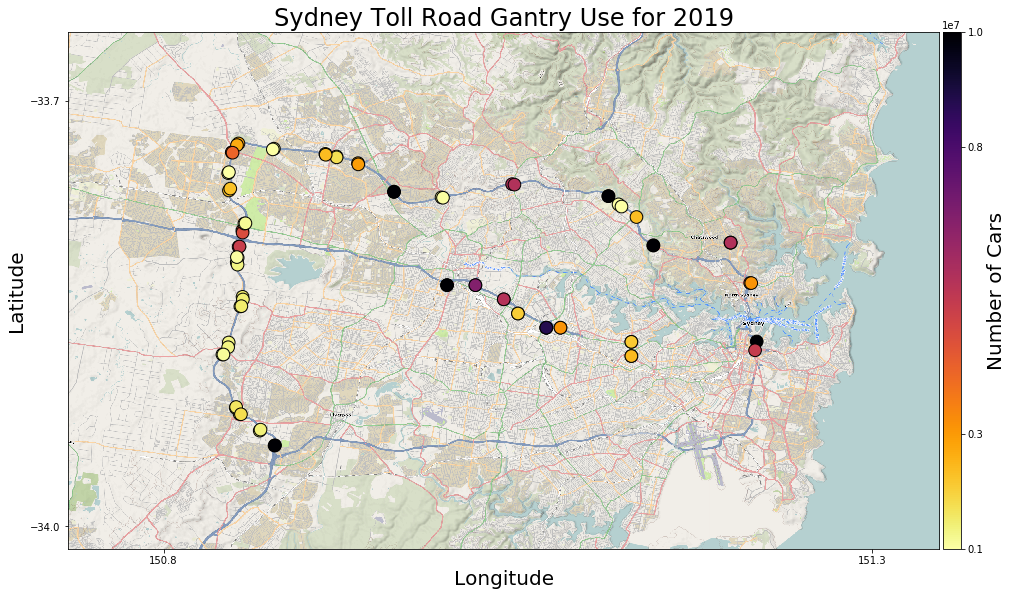

In [13]:
#And plot it
fig=plt.figure(figsize=(16,10)) 
ax = plt.subplot(111)
plt.title("Sydney Toll Road Gantry Use for 2019",fontsize=24)

#Set up the base map, coordinates are from the orignal image output from Mobile Atlas Creator .png and .map oziexplore format
img_extent = (150.732422,151.347313,-34.015957,-33.651208)
fname="Sydney.png"
img = plt.imread(fname)

#Plot the Base map
plt.imshow(img, origin='upper', extent=img_extent,zorder=0)

#Plot the toll points
tolls=plt.scatter(gantSums[:,1],gantSums[:,0],c=gantSums[:,2],s=160,cmap='inferno_r',edgecolors='k',vmin=1000000,vmax=10000000)

#Add all other figure stuff
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
cbar=plt.colorbar(tolls, cax=cax,ticks=[1000000, 3000000, 8000000,10000000])
cbar.set_label('Number of Cars',fontsize=20)
plt.clim(1000000,10000000)

#Clean up the default axis ticks
ax.set_xticks([150.8,151.3])
ax.set_yticks([-34.0,-33.7])

#Put labels on the figure
ax.set_xlabel('Longitude',fontsize=20)
ax.set_ylabel('Latitude',fontsize=20)

plt.show()

We can embed a gif in Jupyter notebook showing the entire sequence of years. You could do this with Python too, but it is easier with jupyter probably (and I am lazy).
    
![SegmentLocal](SydneyTolls_tolluse2020.gif "segment")

We can do alllll time, it just takes longer.

In [14]:
#Get a list of the Toll point names
gantryUnique=df["GantryLocation"].unique()

In [15]:
#Now find the total volume of cars passing through each toll point
gantSums=np.zeros([len(gantryUnique),3])
for i,gant in enumerate(gantryUnique):
    print(i,gant)
    gantSum=df[df["GantryLocation"]==gant].TotalVolume.sum()
    gidx=df[df.GantryLocation==gant].first_valid_index()
    idxLat=df.loc[gidx].GantryGPSLatitude
    idxLon=df.loc[gidx].GantryGPSLongitude
    gantSums[i,0]=idxLat
    gantSums[i,1]=idxLon
    gantSums[i,2]=gantSum

print(gantSums)

0 Mainline Eastbound
1 Sir John Young
2 Mainline Westbound
3 William Street North-bound exit ramp
4 Woolloomooloo Toll Plaza North-bound
5 Military Road North-bound entry ramp
6 Military Road South-bound exit ramp
7 Lane Cove Tunnel East-bound
8 Lane Cove Tunnel West-bound
9 North Ryde main carriageway East-bound
10 Pennant Hills Rd West-bound entry ramp
11 North Ryde main carriageway West-bound
12 Pennant Hills Rd East-bound exit ramp
13 Windsor Rd east-bound exit ramp
14 Windsor Rd West-bound entry ramp
15 Christie Road East-bound entry ramp
16 Herring Road West-bound exit ramp
17 Lane Cove Road ramp Eastbound
18 Church St Exit
19 Church St Entry
20 James Ruse Dr Entry
21 James Ruse Dr Exit
22 Silverwater Rd Exit
23 Silverwater Rd Entry
24 Hill Rd Exit
25 Hill Rd Entry
26 Homebush Bay Dr Exit
27 Homebush Bay Dr (NB) Entry
28 Homebush Bay Dr Entry
29 Concord/Strath Exit
30 Concord/Strath Entry
31 Haberfield Entry
32 Haberfield Exit
33 Ashfield Entry
34 Ashfield Exit
35 M5-M7 North-bou

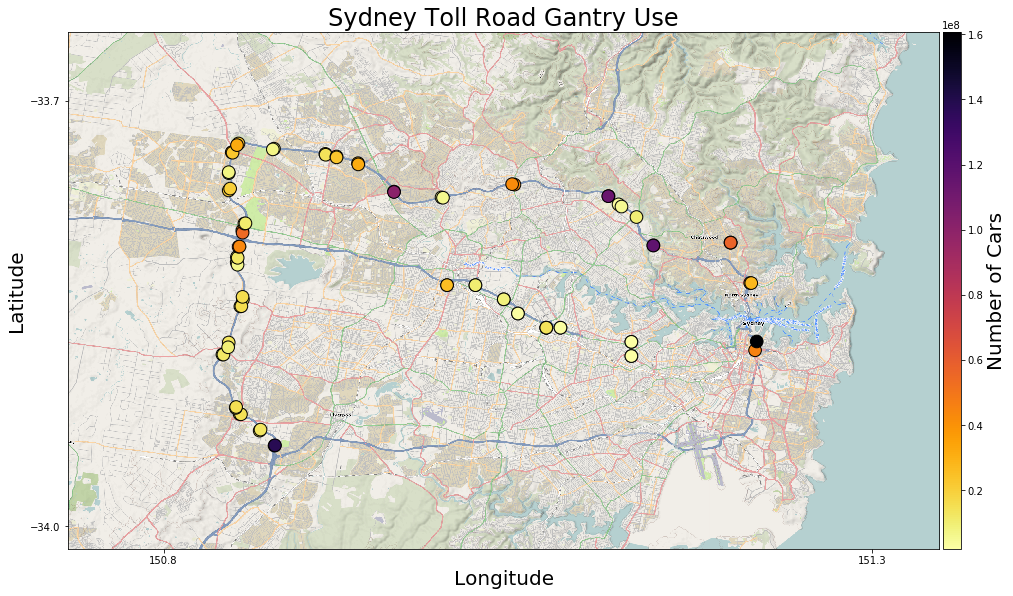

In [16]:
#Plot the gantry use on a map
#Set up the figure
fig=plt.figure(figsize=(16,10)) 
ax = plt.subplot(111)
plt.title("Sydney Toll Road Gantry Use",fontsize=24)

#Set up the base map, 
#coordinates are from the orignal image output from Mobile Atlas Creator .png and .map oziexplore format.
#Data is from OpenStreetMap
img_extent = (150.732422,151.347313,-34.015957,-33.651208)
fname="Sydney.png"
img = plt.imread(fname)

#Plot the Base map
plt.imshow(img, origin='upper', extent=img_extent,zorder=0)

#Plot the toll points
tolls=plt.scatter(gantSums[:,1],gantSums[:,0],c=gantSums[:,2],s=160,cmap='inferno_r',edgecolors='k')

#Add all other figure stuff
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
cbar=plt.colorbar(tolls, cax=cax)
cbar.set_label('Number of Cars',fontsize=20)
#plt.clim(0,2000000)

#Clean up the default axis ticks
ax.set_xticks([150.8,151.3])
ax.set_yticks([-34.0,-33.7])

#Put labels on the figure
ax.set_xlabel('Longitude',fontsize=20)
ax.set_ylabel('Latitude',fontsize=20)

plt.show()

### Some other things I started with...

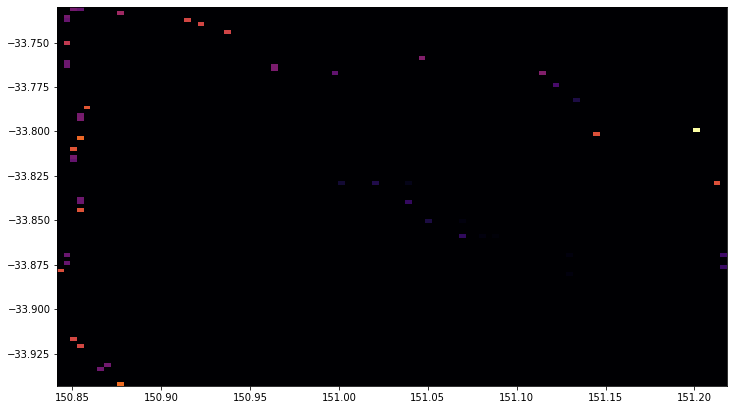

In [17]:
plt.figure(figsize=(12,8)) 

x=df["GantryGPSLongitude"].values
y=df["GantryGPSLatitude"].values

heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower',cmap='inferno')
plt.show()

In [18]:
heatmap0 = np.ma.masked_where(heatmap == 0, heatmap)

In [19]:
lons=np.linspace(yedges[0], yedges[-1],100)
lats=np.linspace(xedges[0], xedges[-1],100)
xv, yv = np.meshgrid(lons, lats)

lon=yv.flatten()
lat=xv.flatten()
use=heatmap0.flatten()

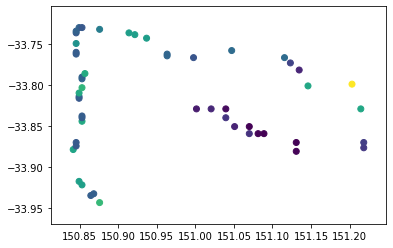

In [20]:
plt.scatter(lon,lat,c=use)

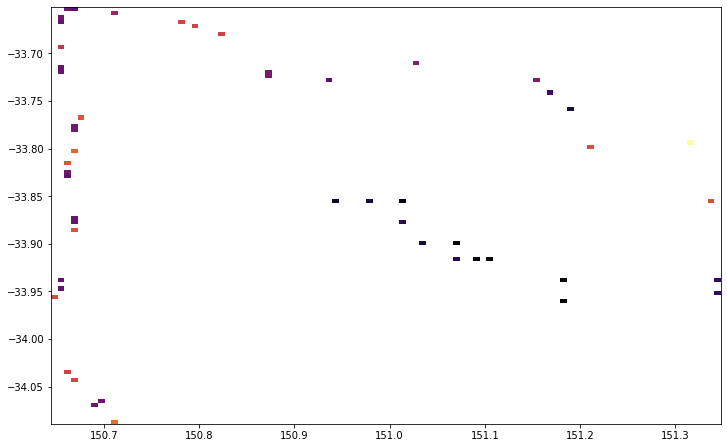

In [21]:
plt.figure(figsize=(12,8)) 
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
extent= (150.644531, 151.347656, -34.089061,-33.651208)
plt.clf()
plt.imshow(heatmap0.T, extent=extent, origin='lower',cmap='inferno')
plt.show()